# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json



# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count 
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#check the head 
cities_df = pd.DataFrame(cities, columns =['Cities']) 
cities_df.head()

,Cities
0,maanshan
1,kegayli
2,taolanaro
3,rikitea
4,namibe


In [13]:
# Set up the inputs to the API call
base_url = "https://api.openweathermap.org/data/2.5/weather?"
params = {
    "appid": api_key,
    "units": 'Imperial'
}

# Print header for output.
print("-----------------------------")
print("Beginning Data Retrieval")
print("-----------------------------")

# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():

    # Get city name from df
    q = row['Cities']

    # add keyword to params dict
    params['q'] = q

    # assemble url and make API request
    print(f"Processing record {index} | {q}")
    response = requests.get(base_url, params=params).json()
    # print(response)
    # print(json.dumps(response, indent=4, sort_keys=True))
       
    try:
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Long'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        
        
    except (KeyError, IndexError):
        print("City not found... skipping.")
        
        
 #make the print       
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

-----------------------------
Beginning Data Retrieval
-----------------------------
Processing record 0 | maanshan
Processing record 1 | kegayli
City not found... skipping.
Processing record 2 | taolanaro
City not found... skipping.
Processing record 3 | rikitea
Processing record 4 | namibe
Processing record 5 | sao filipe
Processing record 6 | new norfolk
Processing record 7 | dikson
Processing record 8 | vaitupu
City not found... skipping.
Processing record 9 | lorengau
Processing record 10 | lebu
Processing record 11 | tilichiki
Processing record 12 | sao jose da coroa grande
Processing record 13 | armacao dos buzios
City not found... skipping.
Processing record 14 | hobart
Processing record 15 | cayenne
Processing record 16 | saint-philippe
Processing record 17 | chokurdakh
Processing record 18 | klaksvik
Processing record 19 | nenjiang
Processing record 20 | nanortalik
Processing record 21 | qaanaaq
Processing record 22 | camabatela
Processing record 23 | saldanha
Processing reco

Processing record 231 | souillac
Processing record 232 | auki
Processing record 233 | san felipe
Processing record 234 | miles city
Processing record 235 | virginia beach
Processing record 236 | tabory
Processing record 237 | durazno
Processing record 238 | santa catalina
Processing record 239 | mackay
Processing record 240 | buenaventura
Processing record 241 | shenjiamen
Processing record 242 | hilo
Processing record 243 | redlands
Processing record 244 | najran
Processing record 245 | ketchikan
Processing record 246 | avarua
Processing record 247 | sitka
Processing record 248 | labuhan
Processing record 249 | loa janan
Processing record 250 | pevek
Processing record 251 | georgiyevka
Processing record 252 | crabtree
Processing record 253 | kaya
Processing record 254 | marcona
City not found... skipping.
Processing record 255 | fort nelson
Processing record 256 | isangel
Processing record 257 | petropavlovsk-kamchatskiy
Processing record 258 | alice town
Processing record 259 | iskat

Processing record 460 | portland
Processing record 461 | batticaloa
Processing record 462 | saint-francois
Processing record 463 | parnarama
Processing record 464 | vila franca do campo
Processing record 465 | penzance
Processing record 466 | khagrachari
City not found... skipping.
Processing record 467 | charters towers
Processing record 468 | roma
Processing record 469 | martapura
Processing record 470 | torbeyevo
Processing record 471 | massakory
Processing record 472 | barentsburg
City not found... skipping.
Processing record 473 | ancud
Processing record 474 | meiganga
Processing record 475 | mamallapuram
Processing record 476 | syracuse
Processing record 477 | gilazi
City not found... skipping.
Processing record 478 | beyneu
Processing record 479 | muhos
Processing record 480 | severo-kurilsk
Processing record 481 | drochtersen
Processing record 482 | campbeltown
Processing record 483 | porto novo
Processing record 484 | amderma
City not found... skipping.
Processing record 485 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Save data to csv
cities_df.to_csv("citiesData.csv")
cities_df.head(15)

# Remove records with Nulls, it gets rid of ValueError.
noNulls_df = cities_df[cities_df.Cloudiness != '']
noNulls_df.head(10)

/Users/ChouMoua/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Cities,Cloudiness,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,maanshan,40.0,1.562904e+09,78.0,31.70,118.50,80.60,4.47
1,kegayli,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,taolanaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,rikitea,0.0,1.562904e+09,81.0,-23.12,-134.97,73.35,14.32
4,namibe,9.0,1.562904e+09,85.0,-15.19,12.15,64.57,12.44
5,sao filipe,0.0,1.562904e+09,87.0,14.90,-24.50,71.97,17.09
6,new norfolk,20.0,1.562904e+09,61.0,-42.78,147.06,48.20,23.04
7,dikson,100.0,1.562904e+09,88.0,73.51,80.55,35.43,13.33
8,vaitupu,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,lorengau,78.0,1.562904e+09,74.0,-2.02,147.27,81.76,15.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

07/11/19


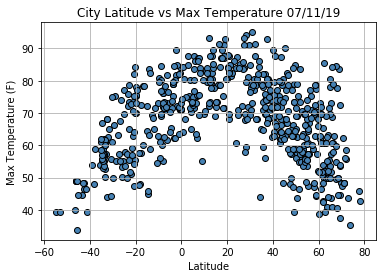

In [9]:
# Getting date of anaylsis
firstDate = noNulls_df.iloc[0,2]
# type(firstDate)

# https://stackoverflow.com/questions/12458595/convert-timestamp-since-epoch-to-datetime-datetime/12458703
timeStamp = time.strftime("%D", time.localtime(firstDate))
print(timeStamp)

# Add title and labels for each axis.
plt.title("City Latitude vs Max Temperature " + timeStamp)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Assign df columns to variables.
latX = noNulls_df['Lat']
maxTempY = noNulls_df['Max Temp']

# Plot each scatter using the variables.
maxTempScatter = plt.scatter(latX, maxTempY, marker='o', color='steelblue', edgecolors='0')
  
# Add a grid to the plot.
plt.grid()

# Save figure and display it here.
plt.savefig('latVsTemp.png', bbox_inches='tight')

plt.show()

#### Latitude vs. Humidity Plot

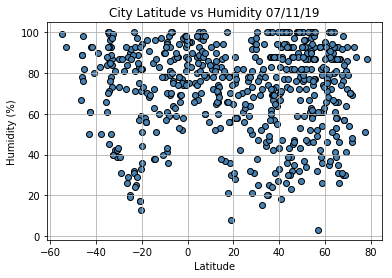

In [10]:
# Add title and labels for each axis.
plt.title("City Latitude vs Humidity " + timeStamp)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Assign df columns to variables.
latX = noNulls_df['Lat']
humidityY = noNulls_df['Humidity']


# Plot each scatter using the variables.
humidityScatter = plt.scatter(latX, humidityY, marker='o', color='steelblue', edgecolors='0')

# Add a grid to the plot.
plt.grid()

# Save figure and display it here.
plt.savefig('latVsHumid.png', bbox_inches='tight')

plt.show()

#### Latitude vs. Cloudiness Plot

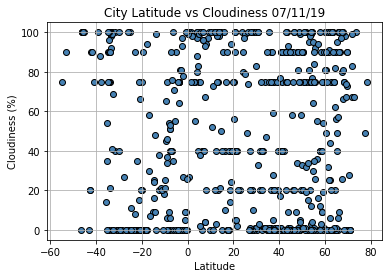

In [11]:
# Add title and labels for each axis.
plt.title("City Latitude vs Cloudiness " + timeStamp)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Assign df columns to variables.
latX = noNulls_df['Lat']
cloudinessY = noNulls_df['Cloudiness']


# Plot each scatter using the variables.
cloudinessScatter = plt.scatter(latX, cloudinessY, marker='o', color='steelblue', edgecolors='0')

# Add a grid to the plot.
plt.grid()

# Save figure and display it here.
plt.savefig('latVsCloud.png', bbox_inches='tight')

plt.show()


#### Latitude vs. Wind Speed Plot

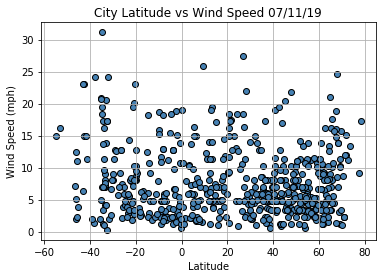

In [12]:
# Add title and labels for each axis.
plt.title("City Latitude vs Wind Speed "  + timeStamp)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Assign df columns to variables.
latX = noNulls_df['Lat']
speedY = noNulls_df['Wind Speed']


# Plot each scatter using the variables.
windSpeedScatter = plt.scatter(latX, speedY, marker='o', color='steelblue', edgecolors='0')

# Add a grid to the plot.
plt.grid()

# Save figure and display it here.
plt.savefig('latVsWind.png', bbox_inches='tight')

plt.show()

In [ ]:
# Trend 1:Cloudliness seems almost at random, there is no real strong correlation that we can make an interpretation on.

In [ ]:
#Trend 2: It is interesting to see that in figure 1., the temps are higher as you approach the equator and cool off as you move away. 

In [ ]:
#Trend 3: There seems to be no relationship between latitude and humidity (figure 2)